In [3]:
# Importing necessary liabraries and settings

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
# ---------------------------------------------- Importing dataset ----------------------------------------------

ids = pd.read_csv(r"C:\Users\samee\OneDrive\Desktop\Practice files\adultKNN.csv")

In [7]:
# Basic data understading

ids.shape

(48842, 15)

In [9]:
ids.head(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [11]:
# ---------------------------------------------- Data Cleaning & Preprocessing ----------------------------------------------

ids.isnull().sum()[ids.isnull().sum() > 0] 
#No null values but can see invalid entries like '?', so considering it as nulls

Series([], dtype: int64)

In [13]:
# Finding all columns with values as '?'

ids[ids == '?'].any()

age                False
workclass           True
fnlwgt             False
education          False
educational-num    False
marital-status     False
occupation          True
relationship       False
race               False
gender             False
capital-gain       False
capital-loss       False
hours-per-week     False
native-country      True
income             False
dtype: bool

In [15]:
# Filling null values

ids.workclass.replace({'?' : 'Private'}, inplace = True) 
ids.occupation.replace({'?': 'Other-service'}, inplace = True ) 
ids['native-country'].replace({'?': 'United-States'}, inplace = True )

# Considered most frequent value for workclass and native country and considered Other-services for occupation,
# as it was existing category in occupation and made more sense to add there. 

In [17]:
# Dropping unnecessary columns

ids = ids.drop(['education', 'fnlwgt'], axis = 1)

# Education dropped as other column 'educational-num' has same data in oridinal numeric format.
# fnlwgt dropped as column has no relavent information.

In [19]:
# Replacing Y variable values to numeric

ids.income.replace({'<=50K' : 0, '>50K' : 1}, inplace = True)

In [21]:
# Converting data to numbers

import sklearn 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [23]:
ids.select_dtypes(include = 'object').columns

# Columns with 'Object' datatype

Index(['workclass', 'marital-status', 'occupation', 'relationship', 'race',
       'gender', 'native-country'],
      dtype='object')

In [25]:
ids[ids.select_dtypes(include = 'object').columns] = ids[ids.select_dtypes(include = 'object').columns].apply(le.fit_transform)

In [27]:
ids.select_dtypes(include = 'object').columns #Data converted to non numeric

Index([], dtype='object')

In [29]:
ids.head()

# Final data

,age,workclass,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,3,7,4,6,3,2,1,0,0,40,38,0
1,38,3,9,2,4,0,4,1,0,0,50,38,0
2,28,1,12,2,10,0,4,1,0,0,40,38,1
3,44,3,10,2,6,0,2,1,7688,0,40,38,1
4,18,3,10,4,7,3,4,0,0,0,30,38,0


In [31]:
#Train test split

from sklearn.model_selection import train_test_split

ids_train, ids_test = train_test_split(ids, test_size = 0.2)

#Spliting into X and Y

ids_train_x = ids_train.drop('income', axis = 1)
ids_train_y = ids_train.income

ids_test_x = ids_test.drop('income', axis = 1)
ids_test_y = ids_test.income

In [53]:
ids.head()

,age,workclass,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,3,7,4,6,3,2,1,0,0,40,38,0
1,38,3,9,2,4,0,4,1,0,0,50,38,0
2,28,1,12,2,10,0,4,1,0,0,40,38,1
3,44,3,10,2,6,0,2,1,7688,0,40,38,1
4,18,3,10,4,7,3,4,0,0,0,30,38,0


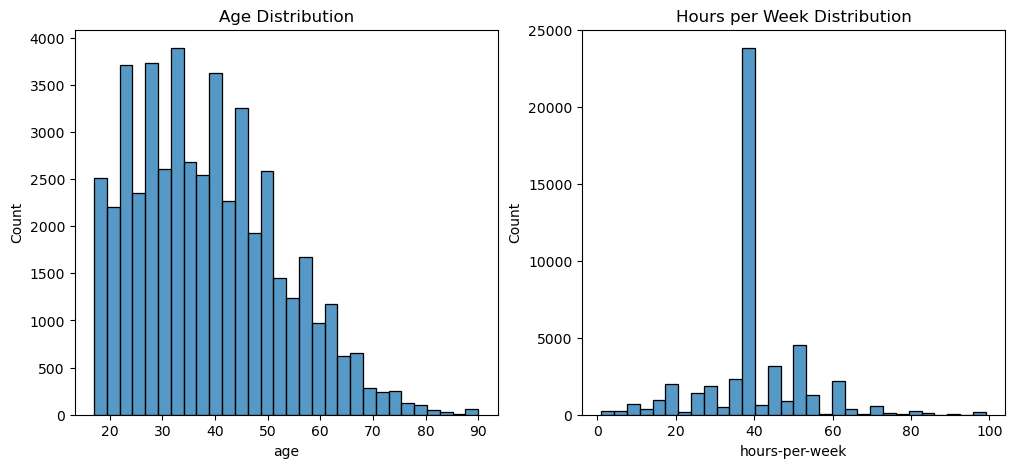

In [35]:
# ---------------------------------------------- Exploratory Data Analysis (EDA) ----------------------------------------------

# Histograms
plt.figure(figsize=(12, 5))

# Age
plt.subplot(1, 2, 1)
sns.histplot(data = ids, x = 'age', bins = 30)
plt.title("Age Distribution")

# Hours per Week
plt.subplot(1, 2, 2)
sns.histplot(data = ids, x='hours-per-week', bins=30)
plt.title("Hours per Week Distribution")

plt.show()

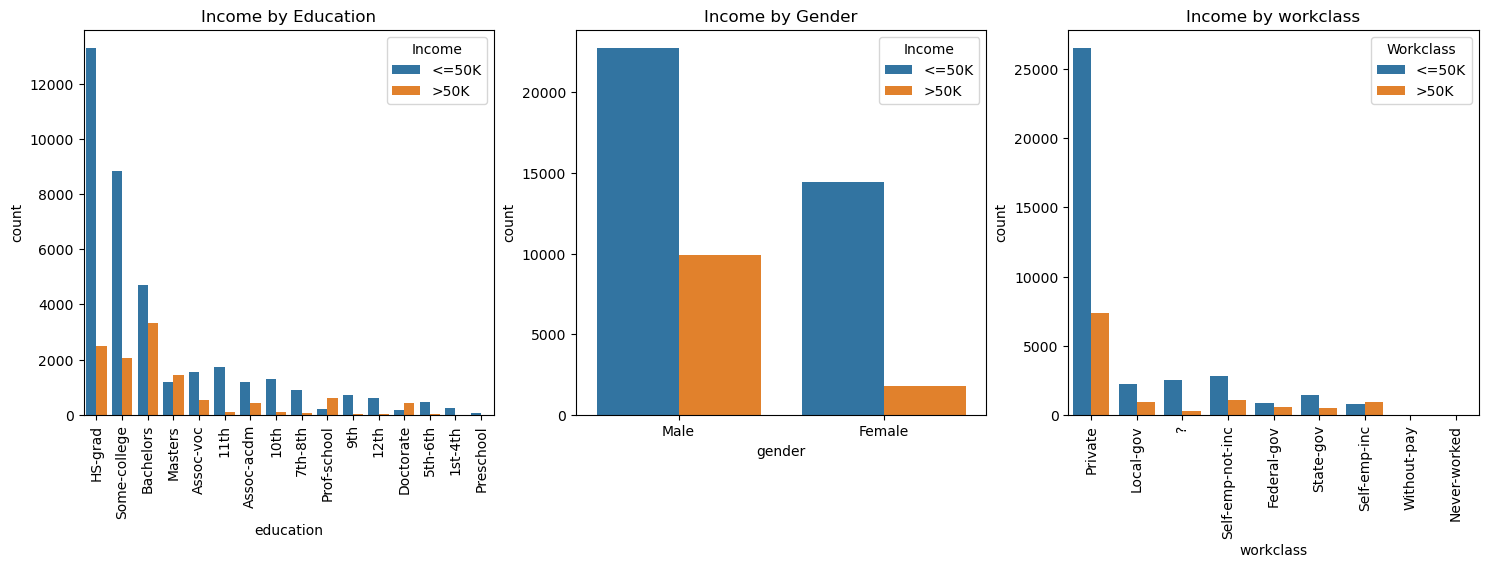

In [77]:
# Barplot

df = pd.read_csv(r"C:\Users\samee\OneDrive\Desktop\Practice files\adultKNN.csv")

plt.figure(figsize=(18, 5))

# Plot 1: Education
plt.subplot(1, 3, 1)
sns.countplot(data = df, x = 'education', hue = 'income', order = df.education.value_counts().index)
plt.title("Income by Education")
plt.xticks(rotation = 90)
plt.legend(title='Income')

# Plot 2: Gender
plt.subplot(1, 3, 2)
sns.countplot(data = df, x = 'gender', hue='income')
plt.title("Income by Gender")
plt.legend(title='Income')

# Plot 3: Workclass
plt.subplot(1, 3, 3)
sns.countplot(data = df, x = 'workclass', hue='income')
plt.title("Income by workclass")
plt.xticks(rotation = 90)
plt.legend(title='Workclass')

plt.show()

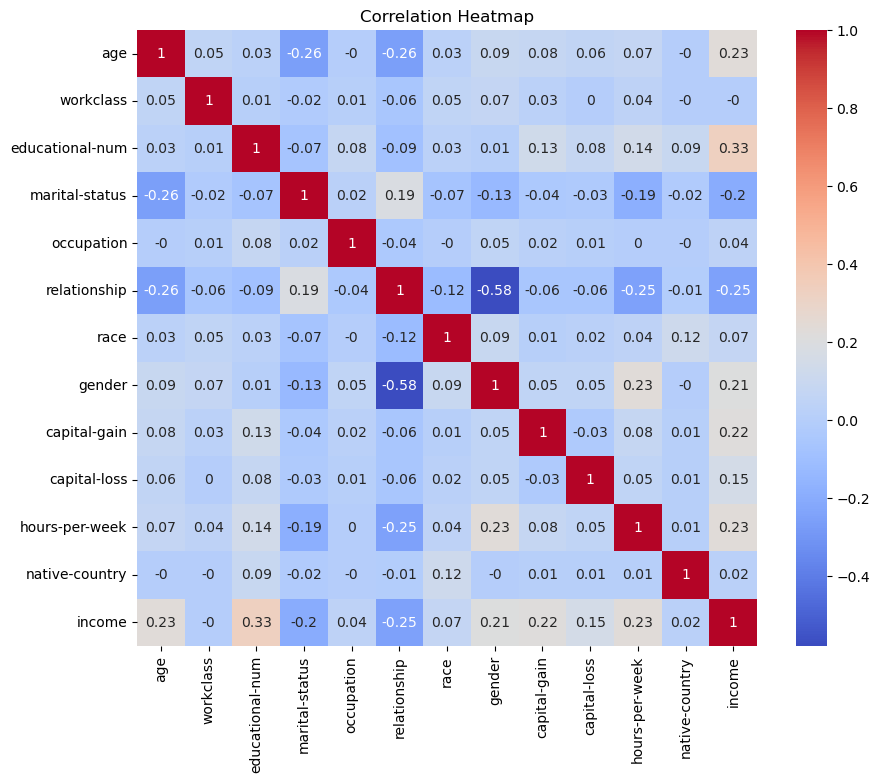

In [41]:
# Heatmap

# Shows co-relation between columns, range bound between -1 to + 1 indicating positive or negative co-relation

df00 = ids.corr().round(2)

plt.figure(figsize =(10, 8))
sns.heatmap(df00, annot=True, cmap='coolwarm', linecolor='black')
plt.title("Correlation Heatmap")
plt.show()

In [81]:
# ---------------------------------------------- MODEL BUILDING ----------------------------------------------

In [83]:
from sklearn.metrics import confusion_matrix, classification_report

In [95]:
#1. Baseline type- Logistic regression

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(ids_train_x, ids_train_y)

logreg_pred = logreg.predict(ids_test_x)

tab = confusion_matrix(ids_test_y, logreg_pred)

print('-- Confusion matrix --')
print(tab)

print('----------------------- Classification report -------------')
print(classification_report(ids_test_y, logreg_pred))

-- Confusion matrix --
[[6942  411]
 [1530  886]]
----------------------- Classification report -------------
              precision    recall  f1-score   support

           0       0.82      0.94      0.88      7353
           1       0.68      0.37      0.48      2416

    accuracy                           0.80      9769
   macro avg       0.75      0.66      0.68      9769
weighted avg       0.79      0.80      0.78      9769



In [97]:
#2. Tree-based type- Decision tree 

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(ids_train_x, ids_train_y)

dt_pred = dt.predict(ids_test_x)

tab = confusion_matrix(ids_test_y, dt_pred)

print('-- Confusion matrix --')
print(tab)

print('----------------------- Classification report -------------')
print(classification_report(ids_test_y, dt_pred))

-- Confusion matrix --
[[6492  861]
 [ 965 1451]]
----------------------- Classification report -------------
              precision    recall  f1-score   support

           0       0.87      0.88      0.88      7353
           1       0.63      0.60      0.61      2416

    accuracy                           0.81      9769
   macro avg       0.75      0.74      0.75      9769
weighted avg       0.81      0.81      0.81      9769



In [99]:
#3. Ensemble type- Random forest

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(ids_train_x, ids_train_y)

rfc_pred = rfc.predict(ids_test_x)
tab = confusion_matrix(ids_test_y, rfc_pred)

print('-- Confusion matrix --')
print(tab)

print('----------------------- Classification report -------------')
print(classification_report(ids_test_y, rfc_pred))

-- Confusion matrix --
[[6788  565]
 [ 918 1498]]
----------------------- Classification report -------------
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      7353
           1       0.73      0.62      0.67      2416

    accuracy                           0.85      9769
   macro avg       0.80      0.77      0.79      9769
weighted avg       0.84      0.85      0.84      9769



In [101]:
#4. Distance type - KNN

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(ids_train_x, ids_train_y)

knn_pred = knn.predict(ids_test_x)

tab = confusion_matrix(ids_test_y, knn_pred)

print('-- Confusion matrix --')
print(tab)

print('----------------------- Classification report -------------')
print(classification_report(ids_test_y, knn_pred))

-- Confusion matrix --
[[6738  615]
 [ 928 1488]]
----------------------- Classification report -------------
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      7353
           1       0.71      0.62      0.66      2416

    accuracy                           0.84      9769
   macro avg       0.79      0.77      0.78      9769
weighted avg       0.84      0.84      0.84      9769



In [105]:
#5. Linear type - SVM

from sklearn.svm import SVC
svm = SVC()
svm.fit(ids_train_x, ids_train_y)

svm_pred = knn.predict(ids_test_x)

tab = confusion_matrix(ids_test_y, svm_pred)

print('-- Confusion matrix --')
print(tab)
 
print('----------------------- Classification report -------------')
print(classification_report(ids_test_y, svm_pred))

-- Confusion matrix --
[[6738  615]
 [ 928 1488]]
----------------------- Classification report -------------
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      7353
           1       0.71      0.62      0.66      2416

    accuracy                           0.84      9769
   macro avg       0.79      0.77      0.78      9769
weighted avg       0.84      0.84      0.84      9769



In [107]:
#6. Boosting type - XGBoost

from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(ids_train_x, ids_train_y)

xgb_pred = knn.predict(ids_test_x)

tab = confusion_matrix(ids_test_y, xgb_pred)

print('-- Confusion matrix --')
print(tab)

print('----------------------- Classification report -------------')
print(classification_report(ids_test_y, xgb_pred))

-- Confusion matrix --
[[6738  615]
 [ 928 1488]]
----------------------- Classification report -------------
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      7353
           1       0.71      0.62      0.66      2416

    accuracy                           0.84      9769
   macro avg       0.79      0.77      0.78      9769
weighted avg       0.84      0.84      0.84      9769



In [123]:
# ---------------------------------------------- CROSS VALIDATION - to compare models ----------------------------------------------

models = {'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(), 'SVM': SVC(),
    'KNN': KNeighborsClassifier(), 'XGBoost': XGBClassifier(),
    'Decision Tree': DecisionTreeClassifier()}

from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score

for name, model in models.items():
    scores = cross_val_score(model, ids_train_x, ids_train_y, cv=5, scoring ='accuracy')  
    print(name,'accuracy_scores:', scores, 'Average :', scores.mean() )

Logistic Regression accuracy_scores: [0.81074856 0.81228407 0.81010877 0.80394164 0.80944459] Average : 0.8093055249195098
Random Forest accuracy_scores: [0.85323097 0.85745361 0.85054383 0.84873304 0.84540568] Average : 0.8510734264549038
SVM accuracy_scores: [0.80614203 0.8084453  0.80857326 0.7994625  0.80240594] Average : 0.8050058059741845
KNN accuracy_scores: [0.84772873 0.85028791 0.84107486 0.84591758 0.83862298] Average : 0.8447264117867744
XGBoost accuracy_scores: [0.87306462 0.88010237 0.86948177 0.87701561 0.86472997] Average : 0.8728788674493883
Decision Tree accuracy_scores: [0.81202815 0.82200896 0.81599488 0.8140517  0.81238802] Average : 0.81529434266727


In [125]:
# After cross validation and analyzing each model's classification report and confustion matrix, RANDOM FOREST and XGBOOST 
# are performing better then rest, we can further tune the model for even better results. 

In [201]:
# ---------------------------------------------- GRID SEARCH ----------------------------------------------

from sklearn.model_selection import GridSearchCV

rf_param_grid = {'n_estimators': [100, 500], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 10]}

rf_model = RandomForestClassifier(class_weight = 'balanced')

rf_grid = GridSearchCV(rf_model, rf_param_grid, cv = 10, scoring='accuracy')
rf_grid.fit(ids_train_x, ids_train_y)

print("Best Random Forest Params:", rf_grid.best_params_)
print("Best Accuracy:", rf_grid.best_score_) 

Best Random Forest Params: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 500}
Best Accuracy: 0.8495633837279701


In [195]:
from xgboost import XGBClassifier

xgb_param_grid = {'n_estimators': [100, 1000], 'max_depth': [3, 5, 7], 'learning_rate': [0.01, 0.05, 0.1, 0.2]}

xgb_model = XGBClassifier()

xgb_grid = GridSearchCV(xgb_model, xgb_param_grid, cv = 10, scoring='accuracy', n_jobs=-1, verbose=1)
xgb_grid.fit(ids_train_x, ids_train_y)

print(" Best XGBoost Params:", xgb_grid.best_params_)
print(" Best Accuracy:", xgb_grid.best_score_)


Fitting 10 folds for each of 24 candidates, totalling 240 fits
 Best XGBoost Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 1000}
 Best Accuracy: 0.8751566159890954


In [191]:
# CREATING MODELS AFTER USING BEST PARAMETERS

# Random forest

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(min_samples_split = 5, n_estimators = 200, class_weight= 'balanced')
rfc.fit(ids_train_x, ids_train_y)

rfc_pred = rfc.predict(ids_test_x)
tab = confusion_matrix(ids_test_y, rfc_pred)

print('-- Confusion matrix --')
print(tab)

print('----------------------- Classification report -------------')
print(classification_report(ids_test_y, rfc_pred))

-- Confusion matrix --
[[6573  780]
 [ 719 1697]]
----------------------- Classification report -------------
              precision    recall  f1-score   support

           0       0.90      0.89      0.90      7353
           1       0.69      0.70      0.69      2416

    accuracy                           0.85      9769
   macro avg       0.79      0.80      0.80      9769
weighted avg       0.85      0.85      0.85      9769



In [197]:
# XGBoost

from xgboost import XGBClassifier

xgb = XGBClassifier(learning_rate = 0.1, max_depth = 3, n_estimators = 1000)
xgb.fit(ids_train_x, ids_train_y)

xgb_pred = knn.predict(ids_test_x)

tab = confusion_matrix(ids_test_y, xgb_pred)

print('-- Confusion matrix --')
print(tab)

print('----------------------- Classification report -------------')
print(classification_report(ids_test_y, xgb_pred))

-- Confusion matrix --
[[6738  615]
 [ 928 1488]]
----------------------- Classification report -------------
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      7353
           1       0.71      0.62      0.66      2416

    accuracy                           0.84      9769
   macro avg       0.79      0.77      0.78      9769
weighted avg       0.84      0.84      0.84      9769



In [158]:
# CONCLUSION- Random Forest is clearly the better final model — it’s more balanced, has higher recall for the positive class 
# and gives slightly better overall performance.

In [183]:
# Final Model: Random Forest (after GridSearchCV)
# Best Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'class_weight': 'balanced'}

# Performance on Test Set:

# Metric	     Class <=50K	Class >50K
# Precision	 0.90	        0.69
# Recall	     0.90	        0.70
# F1-score	 0.90	        0.69

# Overall Accuracy: 85%
# Weighted F1 Score: 0.85

# Confusion Matrix:

# True Negatives: 6594
# False Positives: 759
# False Negatives: 732
# True Positives: 1684

# Insights:
# Class imbalance handled using class_weight='balanced'

# Top features influencing income:
# Education
# Capital Gain
# Hours-per-week
# Marital Status

# Random Forest outperformed others due to better recall and balance

In [185]:
train_preds = rfc.predict(ids_train_x)
test_preds = rfc.predict(ids_test_x)

from sklearn.metrics import accuracy_score

train_acc = accuracy_score(ids_train_y, train_preds)
test_acc = accuracy_score(ids_test_y, test_preds)

print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy : {test_acc:.4f}")


Train Accuracy: 0.9497
Test Accuracy : 0.8474
